In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
from datetime import datetime
from datetime import timedelta

In [4]:
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
train=pd.read_csv('train.csv')

train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
test = pd.read_csv('test.csv')

test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [8]:
df = train.merge(features, how = 'inner', on = ['Date', 'Store'])

df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [9]:
df = df.merge(stores, how = 'inner', on = 'Store')

df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


In [10]:
df.drop('IsHoliday_y', axis = 1, inplace = True)

df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [11]:
df.rename(columns = {'IsHoliday_x':'IsHoliday'}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


Missing value: Markdown columns

In [12]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


The minimum value of Weekly Sales contains negative value which is inaccurate.

In [13]:
df = df.loc[df['Weekly_Sales']>0]

df.shape

(420212, 16)

# Weekly_Sales

<ipython-input-14-593171cef9c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'], ax=ax)


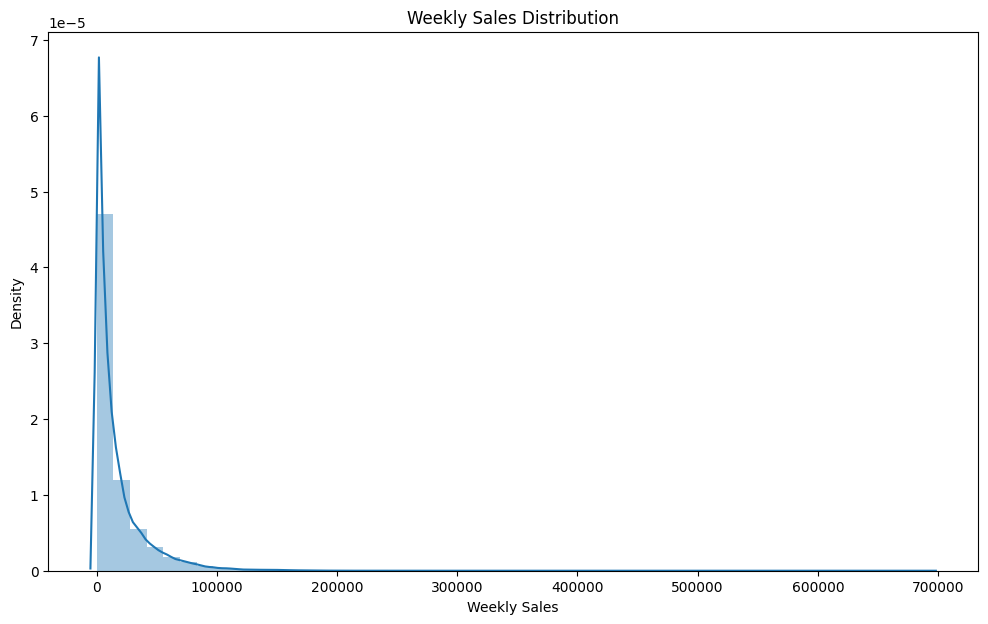

In [14]:
f, ax = plt.subplots(figsize=(12, 7))

sns.distplot(df['Weekly_Sales'], ax=ax)

ax.set(xlabel="Weekly Sales")
ax.set(title="Weekly Sales Distribution")

plt.show()

# Store and Dept

In [15]:
df['Store'].nunique()

45

In [16]:
df['Dept'].nunique()

81

# Date, Year, Month, Day

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     150181 non-null  float64       
 8   MarkDown2     110904 non-null  float64       
 9   MarkDown3     136651 non-null  float64       
 10  MarkDown4     134518 non-null  float64       
 11  MarkDown5     150929 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420

<ipython-input-17-9d8b424fa8e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [18]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week

df.info()

<ipython-input-18-5b9aa99cdfd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Date'].dt.year
<ipython-input-18-5b9aa99cdfd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month
<ipython-input-18-5b9aa99cdfd3>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.week


<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     150181 non-null  float64       
 8   MarkDown2     110904 non-null  float64       
 9   MarkDown3     136651 non-null  float64       
 10  MarkDown4     134518 non-null  float64       
 11  MarkDown5     150929 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420

<ipython-input-18-5b9aa99cdfd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['Date'].dt.week


[Text(0, 0.5, 'Weekly Sales')]

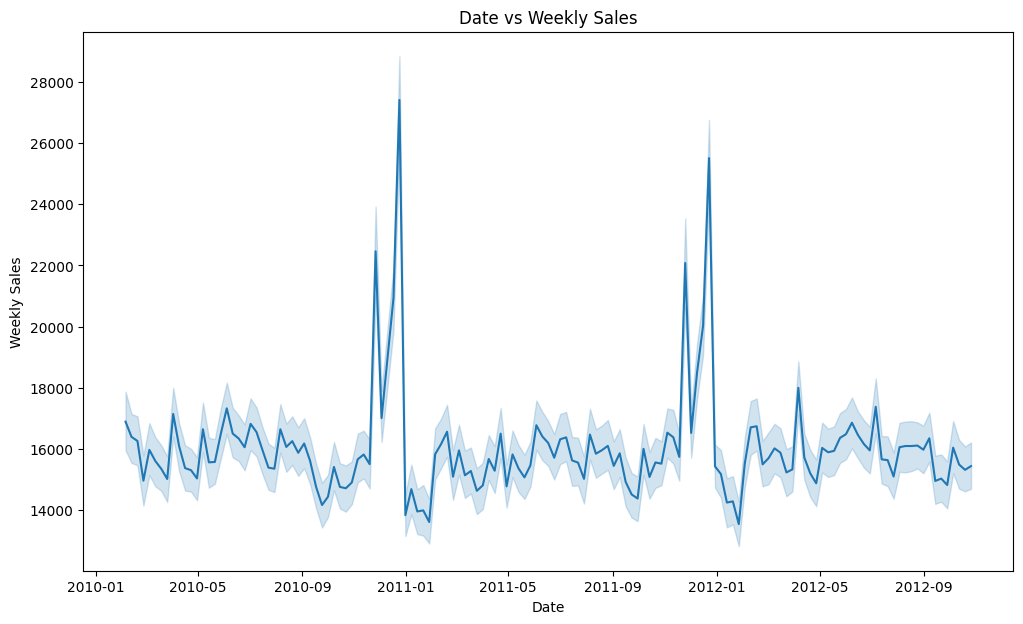

In [19]:
f, ax = plt.subplots(figsize=(12, 7))

sns.lineplot(data=df, x='Date', y='Weekly_Sales', ax=ax)
ax.set(xlabel="Date")
ax.set(title="Date vs Weekly Sales")
ax.set(ylabel='Weekly Sales')

There are peaks around December and January

In [20]:
df.groupby('week')['Weekly_Sales'].mean()

week
1     14928.038770
2     14095.340803
3     14133.401201
4     13569.438615
5     16073.160123
6     16418.777595
7     16517.946636
8     15177.816351
9     15867.717934
10    15583.429172
11    15497.387297
12    14954.904997
13    15756.015034
14    16588.225710
15    15456.223652
16    15663.901397
17    14889.547013
18    16158.987584
19    15600.243681
20    15522.435381
21    16100.570724
22    16856.650245
23    16586.437581
24    16327.096649
25    15972.974790
26    16357.564080
27    16767.002503
28    15742.945870
29    15520.512898
30    15151.930162
31    16384.477997
32    15997.046151
33    16097.359785
34    16024.670562
35    15861.051631
36    15934.061154
37    14872.685250
38    14564.951296
39    14540.344962
40    15815.394715
41    15107.455450
42    15192.028275
43    15282.281277
44    16093.754523
45    16096.508110
46    15617.630356
47    22269.601768
48    16759.704581
49    18731.794840
50    20478.421134
51    26454.164116
52    14635.139843
Name: W

In [21]:
df.groupby('month')['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

The highest sales happened in December

In [22]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

The highest sales happened in 2010

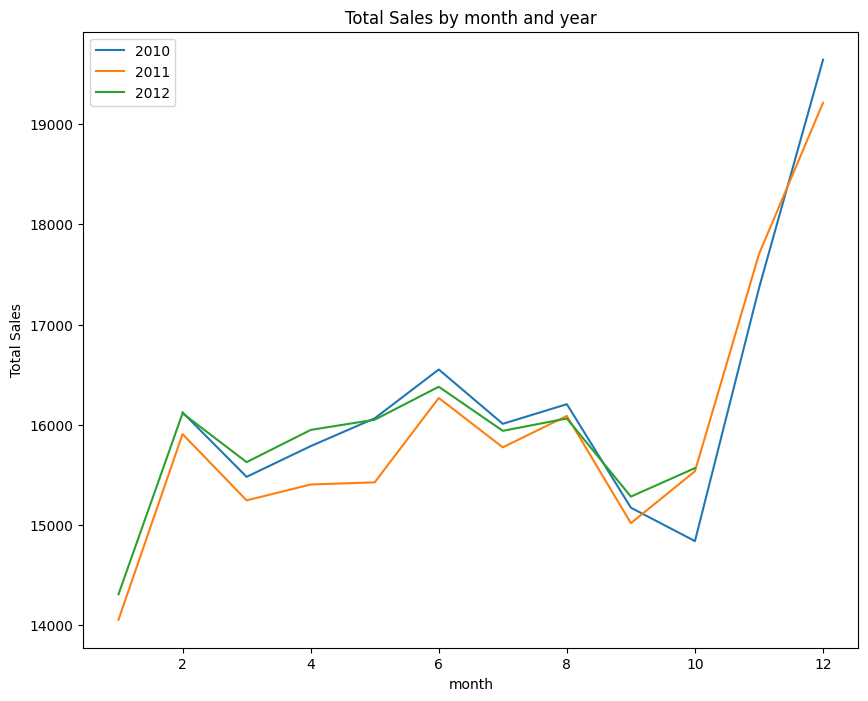

In [23]:
sales = pd.DataFrame(df.groupby(['month', 'year']).Weekly_Sales.mean())
sales.unstack().plot(kind = 'line', figsize = (10, 8), title = 'Total Sales by month and year')
plt.ylabel('Total Sales')
plt.legend(['2010', '2011', '2012'])

In [24]:
sales

Weekly_Sales
month year              
1     2011  14054.378885
      2012  14308.409638
2     2010  16123.339183
      2011  15906.833033
      2012  16114.205186
3     2010  15480.222209
      2011  15245.219561
      2012  15626.987004
4     2010  15786.479121
      2011  15403.855679
      2012  15948.226550
5     2010  16063.976174
      2011  15425.362450
      2012  16050.428765
6     2010  16551.606753
      2011  16267.355096
      2012  16379.278462
7     2010  16009.268745
      2011  15774.614002
      2012  15939.415690
8     2010  16205.333619
      2011  16088.169620
      2012  16062.301274
9     2010  15172.175282
      2011  15018.049242
      2012  15283.248527
10    2010  14839.055563
      2011  15536.033513
      2012  15567.236930
11    2010  17363.277836
      2011  17703.931735
12    2010  19642.617795
      2011  19213.216307

- Weekly Sales in 2012 observation doesn't contain weekly sales in November and December.
- Looking at the plot above, there is a possibility that 2012 sales will be higher than average sales in 2010 if we have observation in November and December.

# Is_Holiday

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

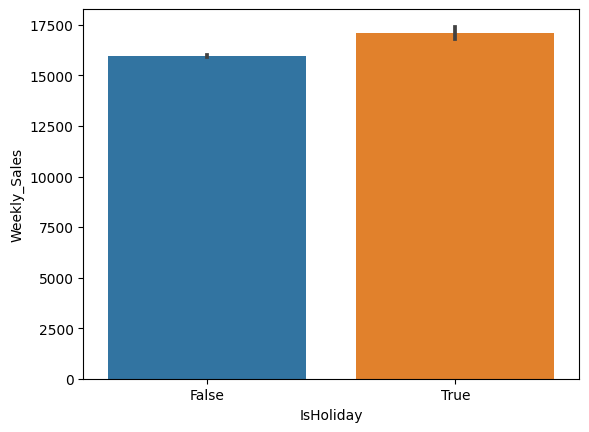

In [25]:
sns.barplot(data=df, x='IsHoliday', y='Weekly_Sales')

In [26]:
holiday = df.loc[df['IsHoliday']==True]

holiday['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

- Super Bowl: 12-Feb-10 (2010-02-12), 11-Feb-11 (2011-02-11), 10-Feb-12 (2012-02-10), 8-Feb-13
- Labor Day: 10-Sep-10 (2010-09-10), 9-Sep-11 (2011-09-09), 7-Sep-12 (2012-09-07), 6-Sep-13
- Thanksgiving: 26-Nov-10 (2010-11-26), 25-Nov-11 (2011-11-25), 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10 (2010-12-31), 30-Dec-11 (2011-12-30), 28-Dec-12, 27-Dec-13

## Super Bowl

In [27]:
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

df

<ipython-input-27-3ddee359ada3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,week,Super_Bowl
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,43,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,43,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,43,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,43,False


<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

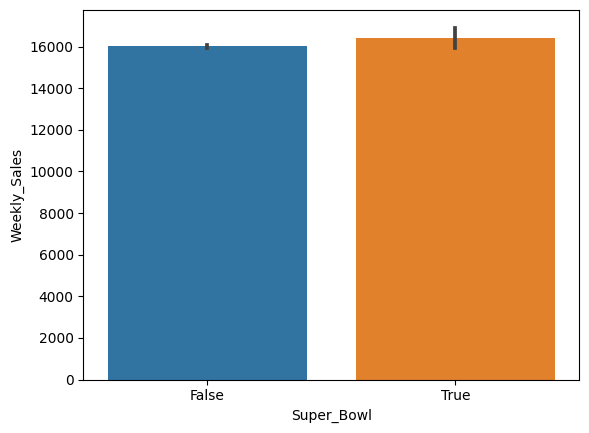

In [28]:
sns.barplot(data=df, x='Super_Bowl', y='Weekly_Sales')

Super Bowl holiday slightly increases weekly sales

## Labor Day

In [29]:
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

df

<ipython-input-29-044c7707b437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,year,month,week,Super_Bowl,Labor_Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,2010,2,5,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,2010,2,5,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,2010,2,5,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,2010,2,5,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,A,151315,2010,2,5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,B,118221,2012,10,43,False,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,B,118221,2012,10,43,False,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,B,118221,2012,10,43,False,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,B,118221,2012,10,43,False,False


<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

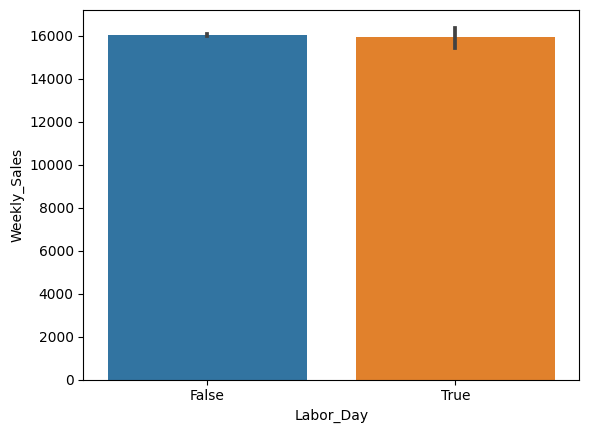

In [30]:
sns.barplot(data=df, x='Labor_Day', y='Weekly_Sales')

Labor day doesn't increase weekly sales

## Thanksgiving

In [31]:
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

df

<ipython-input-31-f66d445af763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,year,month,week,Super_Bowl,Labor_Day,Thanksgiving
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,2010,2,5,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,2010,2,5,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,2010,2,5,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,2010,2,5,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,2010,2,5,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,2012,10,43,False,False,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,2012,10,43,False,False,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,2012,10,43,False,False,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,2012,10,43,False,False,False


<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

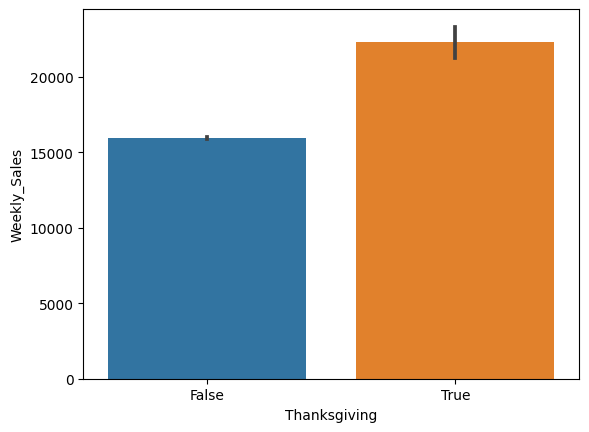

In [32]:
sns.barplot(data=df, x='Thanksgiving', y='Weekly_Sales')

Thanksgiving holiday significantly increases weekly sales

# Christmas

In [33]:
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

df

<ipython-input-33-5a83ba095dc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,year,month,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,2,5,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,2,5,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,2,5,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,2,5,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,2010,2,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,10,43,False,False,False,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,10,43,False,False,False,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,10,43,False,False,False,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,2012,10,43,False,False,False,False


<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

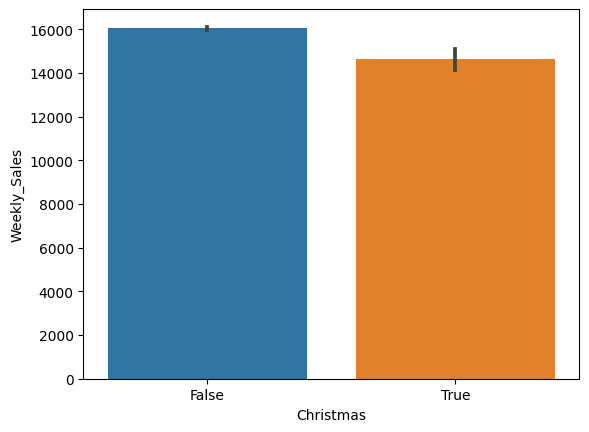

In [34]:
sns.barplot(data=df, x='Christmas', y='Weekly_Sales')

Christmas holiday doesn't increase weekly sales

# Markdown

In [35]:
df = df.fillna(0)

df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
month           0
week            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

# Data Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['Type'] = le.fit_transform(df['Type'])

df['Type'].unique()

array([0, 1, 2])

In [38]:
df['Super_Bowl'] = df['Super_Bowl'].astype(bool).astype(int)

df['Super_Bowl'].unique()

array([0, 1])

In [39]:
df['Labor_Day'] = df['Labor_Day'].astype(bool).astype(int)

df['Labor_Day'].unique()

array([0, 1])

In [40]:
df['Thanksgiving'] = df['Thanksgiving'].astype(bool).astype(int)

df['Thanksgiving'].unique()

array([0, 1])

In [41]:
df['Christmas'] = df['Christmas'].astype(bool).astype(int)

df['Christmas'].unique()

array([0, 1])

In [42]:
df['IsHoliday'] = df['IsHoliday'].astype(bool).astype(int)

df['IsHoliday'].unique()

array([0, 1])

# Features Correlation

<ipython-input-43-b7796c63744e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


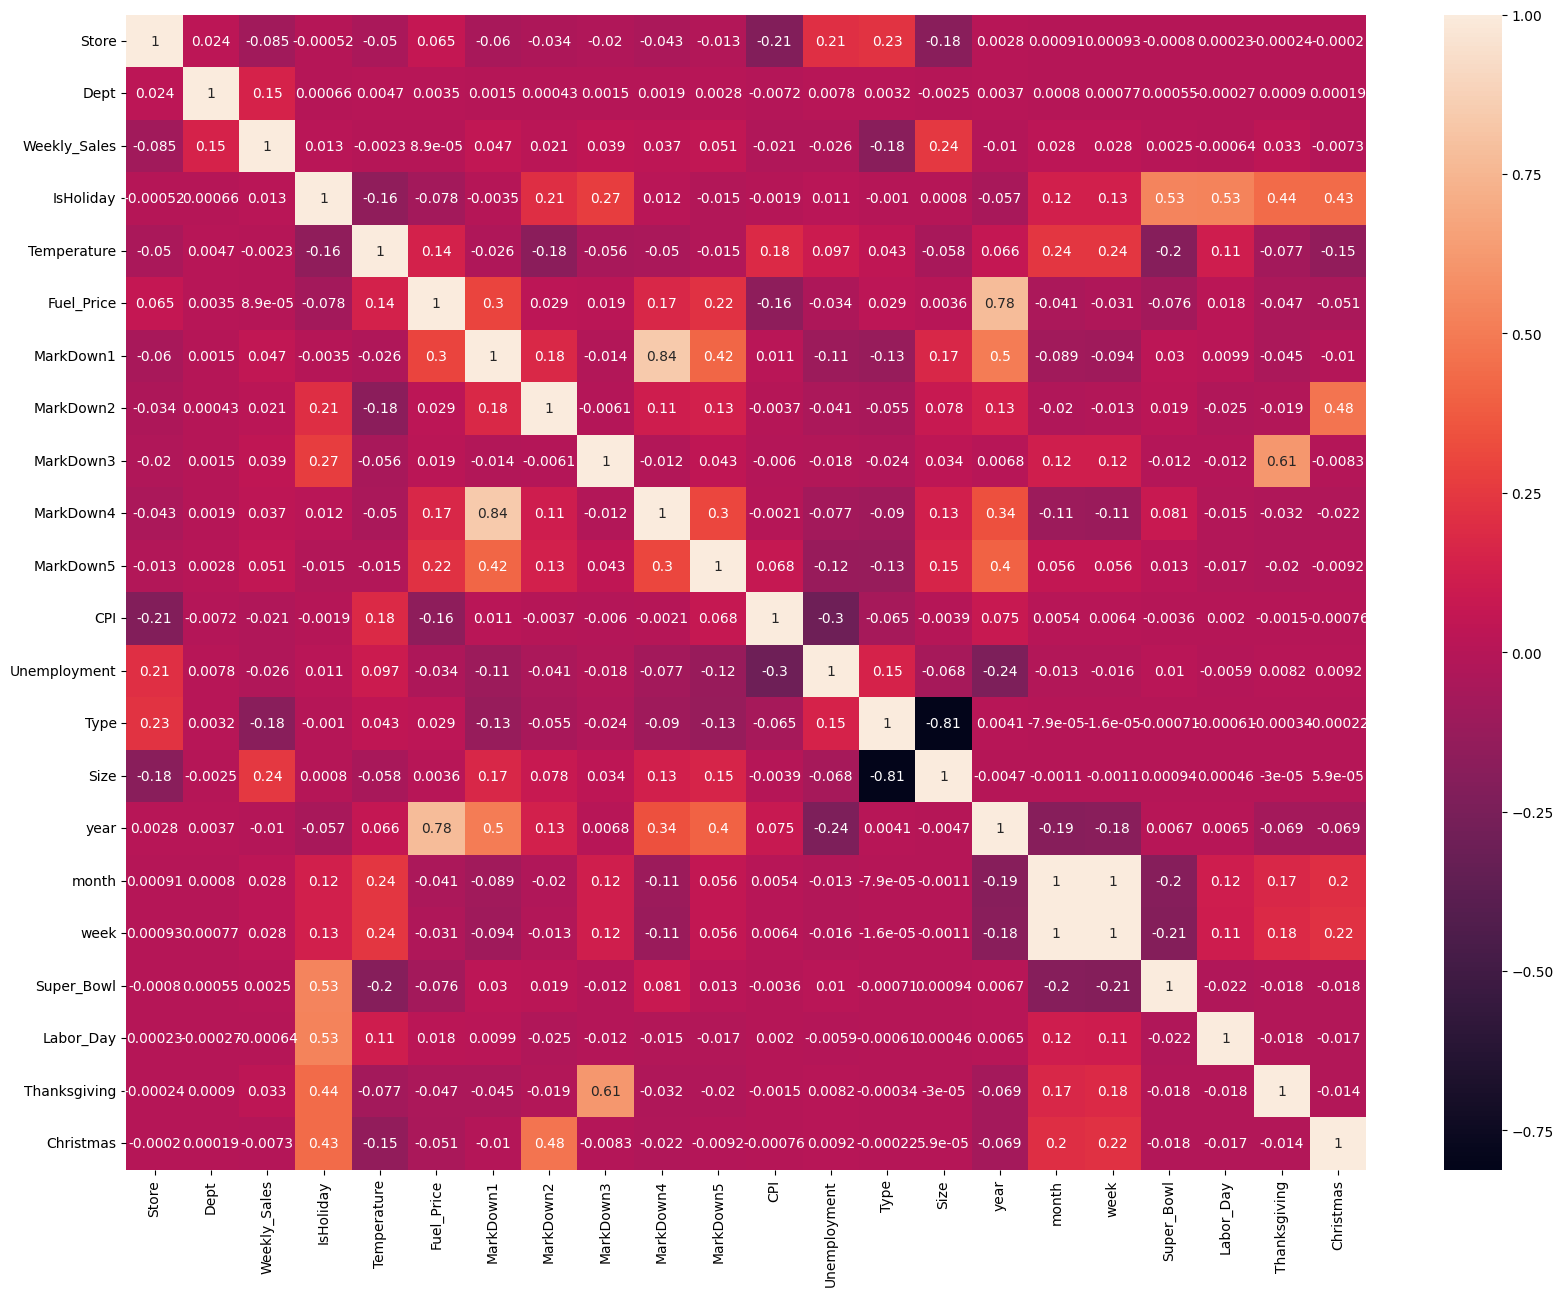

In [43]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Split Dataset

In [44]:
df = df.sort_values(by='Date', ascending=True)

In [45]:
df_copy = df.copy()

In [46]:
train_data = df_copy[:int(0.7*(len(df_copy)))]
test_data = df_copy[int(0.7*(len(df_copy))):]

In [47]:
train_data.drop('Date', axis=1, inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294148 entries, 0 to 104915
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         294148 non-null  int64  
 1   Dept          294148 non-null  int64  
 2   Weekly_Sales  294148 non-null  float64
 3   IsHoliday     294148 non-null  int64  
 4   Temperature   294148 non-null  float64
 5   Fuel_Price    294148 non-null  float64
 6   MarkDown1     294148 non-null  float64
 7   MarkDown2     294148 non-null  float64
 8   MarkDown3     294148 non-null  float64
 9   MarkDown4     294148 non-null  float64
 10  MarkDown5     294148 non-null  float64
 11  CPI           294148 non-null  float64
 12  Unemployment  294148 non-null  float64
 13  Type          294148 non-null  int64  
 14  Size          294148 non-null  int64  
 15  year          294148 non-null  int64  
 16  month         294148 non-null  int64  
 17  week          294148 non-null  int64  
 18  Supe

<ipython-input-47-17ce2663f459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('Date', axis=1, inplace=True)


In [48]:
test_data.drop('Date', axis=1, inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126064 entries, 104914 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         126064 non-null  int64  
 1   Dept          126064 non-null  int64  
 2   Weekly_Sales  126064 non-null  float64
 3   IsHoliday     126064 non-null  int64  
 4   Temperature   126064 non-null  float64
 5   Fuel_Price    126064 non-null  float64
 6   MarkDown1     126064 non-null  float64
 7   MarkDown2     126064 non-null  float64
 8   MarkDown3     126064 non-null  float64
 9   MarkDown4     126064 non-null  float64
 10  MarkDown5     126064 non-null  float64
 11  CPI           126064 non-null  float64
 12  Unemployment  126064 non-null  float64
 13  Type          126064 non-null  int64  
 14  Size          126064 non-null  int64  
 15  year          126064 non-null  int64  
 16  month         126064 non-null  int64  
 17  week          126064 non-null  int64  
 18 

<ipython-input-48-0f9fb1c7fc17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('Date', axis=1, inplace=True)


In [49]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [50]:
# x_train = train_data_copy.drop(['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Fuel_Price'], axis=1)
# x_test = test_data_copy.drop(['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Fuel_Price'], axis=1)
x_train = train_data_copy.drop(['Weekly_Sales'], axis=1)
x_test = test_data_copy.drop(['Weekly_Sales'], axis=1)
y_train = train_data_copy['Weekly_Sales']
y_test = test_data_copy['Weekly_Sales']

In [51]:
train_date = df_copy[:int(0.7*(len(df_copy)))]
test_date = df_copy[int(0.7*(len(df_copy))):]

# Modeling

In [97]:
def wmae_test(test, pred):
    weights = x_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [108]:
def wmae_test2(test, pred, x_test):
  if 'IsHoliday' not in x_test.columns:
    raise ValueError("'IsHoliday' column not found in x_test.")

  x_test['IsHoliday'] = x_test['IsHoliday'].astype(bool)
  weights = x_test['IsHoliday'].apply(lambda is_holiday: 5 if is_holiday else 1)
  error = np.sum(weights * np.abs(test - pred)) / np.sum(weights)

  return error

## Linear Regression

In [53]:
from sklearn import linear_model

In [54]:
ls = linear_model.LinearRegression()
ls.fit(x_train, y_train)
y_pred_ls = ls.predict(x_test)

In [110]:
print("WMAE = ",wmae_test2(y_test, y_pred_ls, x_test))

WMAE =  14280.07561911375


## Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
y_pred_rf = rf.predict(x_test)

In [111]:
print("WMAE = ",wmae_test2(y_test, y_pred_rf, x_test))

WMAE =  2269.2938273594095


## Xgboost

In [60]:
import xgboost as xgb

In [61]:
xgb_reg=xgb.XGBRegressor()
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_test)

In [112]:
print("WMAE = ",wmae_test2(y_test, y_pred_xgb, x_test))

WMAE =  3340.577025815415


## ARIMA

In [63]:
from statsmodels.tsa.stattools import adfuller

In [64]:
df_copy.set_index('Date', inplace=True)
df_weekly = df_copy.resample('W').mean()

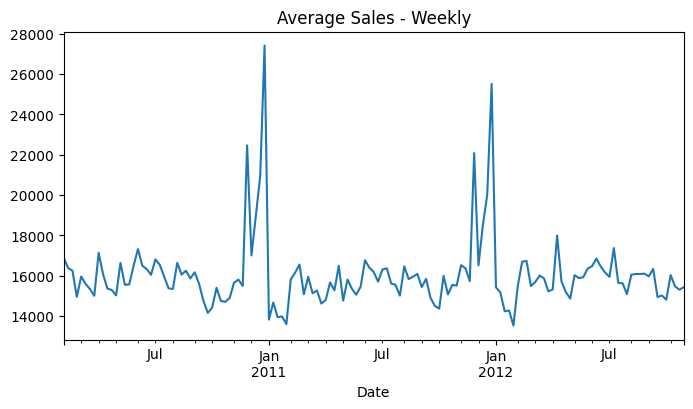

In [65]:
plt.figure(figsize=(8,4))
df_weekly['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

### ADF Test

In [66]:
def is_stationary(data):
  result = adfuller(data.dropna())
  adf_statistic = result[0]
  p_value = result[1]
  critical_values = result[4]
  print("ADF Statistic:", adf_statistic)
  print("P-value:", p_value)
  print("Critical Values:")
  for key, value in critical_values.items():
    print(f"{key}: {value}")

In [67]:
is_stationary(df_weekly['Weekly_Sales'])

ADF Statistic: -5.927107223737568
P-value: 2.429049208204276e-07
Critical Values:
1%: -3.47864788917503
5%: -2.882721765644168
10%: -2.578065326612056


the data is stationary

### Split Data

In [68]:
train_date_arima = df_weekly[:int(0.7*(len(df_weekly)))]
test_date_arima = df_weekly[int(0.7*(len(df_weekly))):]

### Implement ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


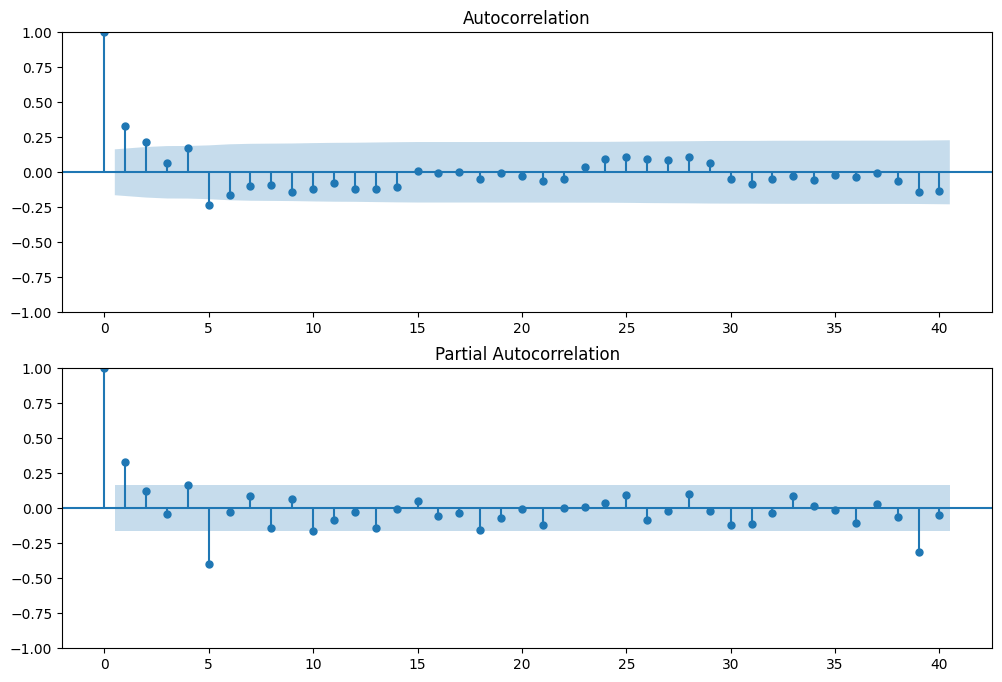

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_weekly['Weekly_Sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_weekly['Weekly_Sales'],lags=40,ax=ax2)

In [76]:
from statsmodels.tsa.arima.model import ARIMA

arima_model=ARIMA(train_date_arima['Weekly_Sales'],order=(5,0,1))
arima_model_fit=arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(5, 0, 1)   Log Likelihood                -886.941
Date:                Mon, 24 Jul 2023   AIC                           1789.881
Time:                        01:37:28   BIC                           1810.723
Sample:                    02-07-2010   HQIC                          1798.316
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.615e+04    539.190     29.950      0.000    1.51e+04    1.72e+04
ar.L1          0.3909      0.403      0.970      0.332      -0.399       1.181
ar.L2          0.1140      0.128      0.893      0.372      -0.136       0.364
ar.L3          0.0086      0.096      0.089      0.929      -0.180       0.197
ar.L4          0.3489      0.062      5.656      0.000       0.228       0.470
ar.L5         -0.4576      0.094     -4.864      0.000      -0.642      -0.273
ma.L1         -0.0701      0.475     -0.148      0.883      -1.001       0.861
sigma2       3.08e+06   3.85e+05      7.999      0.000    2.33e+06    3.84e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               190.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.62   Skew:                             1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
X_test = test_date_arima.drop(columns=['Weekly_Sales'])

In [78]:
predictions = arima_model_fit.forecast(steps=len(X_test))

In [79]:
predictions_list = predictions.tolist()

print(predictions_list)

[17754.223618431108, 17045.477312699324, 18167.58917139149, 12516.22455169837, 15857.946845350245, 15216.589937223918, 16014.112235636128, 13796.426721174545, 16766.862959043752, 15929.089813868912, 16492.906148372498, 15504.684540101709, 17226.56893193475, 16140.267541732595, 16483.505960908562, 15905.86422982471, 16762.781134007928, 15867.926920954964, 16227.701865071207, 15915.09761136922, 16389.510347365656, 15838.098670133277, 16208.956673308305, 16021.446340199216, 16294.246215822497, 15973.23052054869, 16258.943621497026, 16101.25215327809, 16250.400815251458, 16056.353897304842, 16242.723627846088, 16108.977350391104, 16200.4690288714, 16086.639211082953, 16205.239528755814, 16107.466030920106, 16174.91086298548, 16109.569106509145, 16184.340776328443, 16118.317242669309, 16168.74250271177, 16127.910535586632, 16173.116759886325]


In [80]:
predictions_df = pd.DataFrame(predictions_list, index=predictions.index, columns=['Predicted_Weekly_Sales'])

### Plot The Result

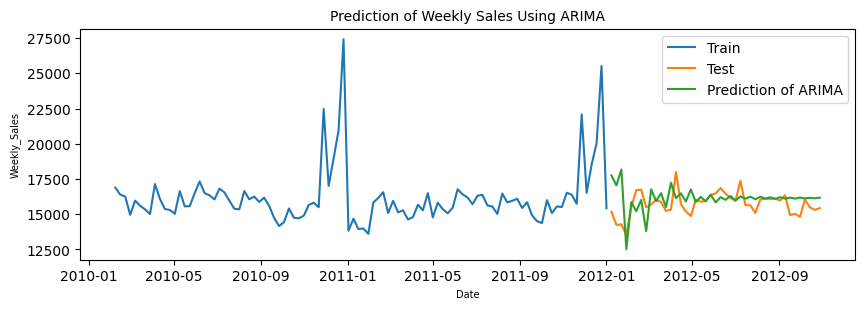

In [81]:
plt.figure(figsize=(10,3))
plt.title('Prediction of Weekly Sales Using ARIMA', fontsize=10)
plt.plot(train_date_arima.index, train_date_arima['Weekly_Sales'], label='Train')
plt.plot(test_date_arima.index, test_date_arima['Weekly_Sales'], label='Test')
plt.plot(predictions_df.index, predictions_df['Predicted_Weekly_Sales'], label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=7)
plt.ylabel('Weekly_Sales', fontsize=7)
plt.show()

In [106]:
print("WMAE = ",wmae_test2(test_date_arima['Weekly_Sales'], predictions, X_test))

WMAE =  843.4498001008382


ARIMA gives the best result